<h1>1) Elegir 3 estaciones </h1>

<p>Latitud Alta: Canadá - Media: Madrid - Baja: Ecuador<p>

In [1]:
import numpy as np
import gpstk
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Cargar ficheros</h3>

In [26]:
can_n="data/flin2400.15n"
can_o="data/flin2400.15o"
mad_n="data/madr2400.15n"
mad_o="data/madr2400.15o"
ec_n="data/riop2400.15n"
ec_o="data/riop2400.15o"

<h2>2)Graficar P1 y P2 en función del tiempo, con un solo satélite</h2>

In [3]:
import numpy as np
import gpstk
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

def plot(ofile,strsat): 
    oheader, odata = gpstk.readRinex3Obs(ofile,strict=True)
    #tomar datos que sean del satelite
    tc=[] #Tiempo civil
    ts=[]#segundos del dia
    p1,p2=[],[]
    obs_types = np.array([i for i in oheader.R2ObsTypes])
    P1_idx = np.where(obs_types=="P1")[0][0]
    P2_idx = np.where(obs_types=="P2")[0][0]
    print "Observables",obs_types #los indices varian, y los observables
    for obsdato in odata: #por cada intervalo 
        my_sat = [satID for satID, datumList in obsdato.obs.iteritems() ] #satelites en este tiempo observados
        for sat in my_sat: 
            if str(sat)==strsat:
                time=obsdato.time #tiempo de la observacion de mi satelite
                tc.append(str(gpstk.CivilTime(time)))
    
                # This is the typical way to handle civil time
                civtime = gpstk.CivilTime(time)
                #print civtime

                # The YDSTime class is very useful for common GNSS tasks
                sod=float(time.getSecondOfDay())
                ts.append(sod)
                
                ps1=obsdato.getObs(sat, P1_idx).data #P1 en t
                p1.append(ps1)
                
                ps2=obsdato.getObs(sat, P2_idx).data#P2 en t
                p2.append(ps2)
        
    plt.figure(figsize=(8,8))
    plt.subplot(211)
    plt.scatter(ts, p1, s=1, alpha=0.5, c="g",marker="*")
    plt.ylabel('P1 [meters]')
    plt.xlabel('Time of the day [seconds]')
    plt.ylim(2e7,2.6e7)
    
    plt.subplot(212)
    plt.scatter(ts,p2,alpha=0.5,c="b", marker="*")   
    plt.ylabel('P2 [meters]')
    plt.xlabel('Time of the day [seconds]')
    plt.ylim(2e7,2.6e7)
    
    print "Civil time of first observation: ",tc[0]
    print "Civil time of last observation: ",tc[-1]
    print "Seconds time of first observation: ",ts[0]
    print "Seconds time of last observation: ",ts[-1]
    print "Intervals: ",len(tc)

Observables ['L1' 'L2' 'C1' 'C2' 'P1' 'P2' 'S1' 'S2']
Civil time of first observation:  08/28/2015 00:00:00 GPS
Civil time of last observation:  08/28/2015 23:59:30 GPS
Seconds time of first observation:  0.0
Seconds time of last observation:  86370.0
Intervals:  994


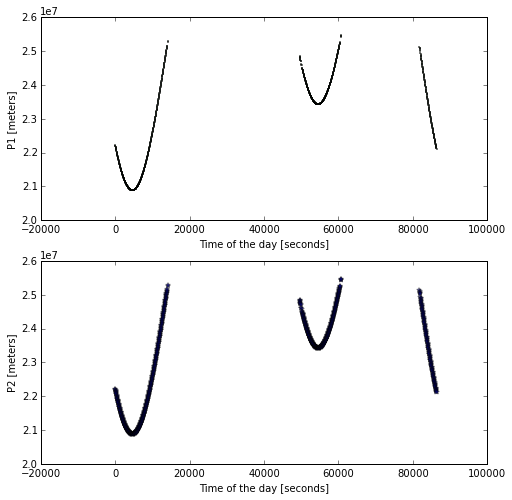

In [4]:
plot(can_o,"GPS 15")

<h2>Graficar P1 y P2 en función del tiempo, con todos los satélites</h2>

In [5]:
import numpy as np
import gpstk
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

#hacer array con p's de cada satelite y graficarlos contra t
def plotP1vsT(ofile):
    oheader, odata = gpstk.readRinex3Obs(ofile,strict=True)
    #tomar datos que sean del satelite
    ts=[]#segundos del dia
    p1=[]
    p2=[]
    obs_types = np.array([i for i in oheader.R2ObsTypes])
    print obs_types
    P1_idx = np.where(obs_types=="P1")[0][0]
    P2_idx = np.where(obs_types=="P2")[0][0]
    for obsdato in odata: #por cada intervalo 
        my_sat = [satID for satID, datumList in obsdato.obs.iteritems() ] 
        for sat in my_sat:  #en cada intervalo se ven satelites, no todos son los mismos
            
            time=obsdato.time #tiempo de la observacion de mi satelite

            # The YDSTime class is very useful for common GNSS tasks
            sod=float(time.getSecondOfDay())
            ts.append(sod)

            ps1=obsdato.getObs(sat, P1_idx).data #P1 en t
            p1.append(ps1)

            ps2=obsdato.getObs(sat, P2_idx).data#P2 en t
            p2.append(ps2)
        
    plt.figure(figsize=(10,10)) 
    plt.subplot(211)
    plt.scatter(ts, p1, s=1, alpha=0.5, color="green",marker="*")
    plt.ylabel('P1 [meters]')
    plt.xlabel('Time of the day [seconds]')
    plt.ylim(2e7,2.6e7)
 
    
    plt.subplot(212)
    plt.scatter(ts, p2, s=1, alpha=0.5, color="blue",marker="*")
    plt.ylim(2e7,2.6e7)
    plt.ylabel('P2 [meters]')
    plt.xlabel('Time of the day [seconds]')
            
  
    print "Time of the first observation: ",ts[0]
    print "Time of the last observation: ",ts[-1]
    print "Intervals: ",len(ts)
   

<h2>Latitud alta (Canadá)</h2>

['L1' 'L2' 'C1' 'C2' 'P1' 'P2' 'S1' 'S2']
Time of the first observation:  0.0
Time of the last observation:  86370.0
Intervals:  53770


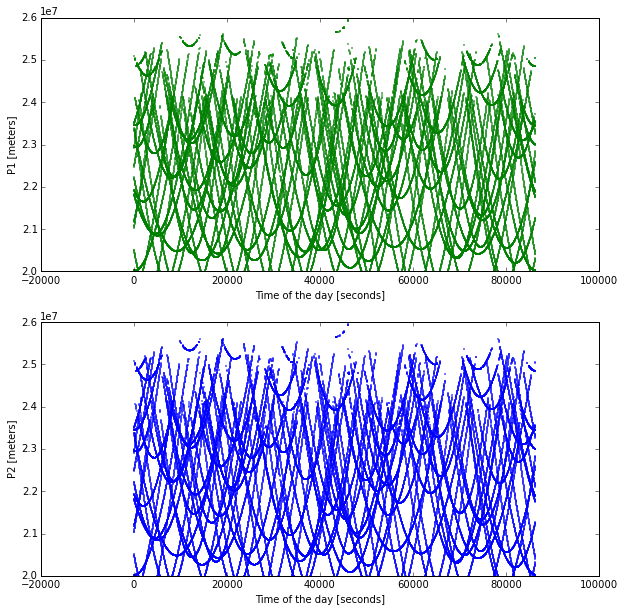

In [6]:
plotP1vsT(can_o)

<h2>Latitud Media (Madrid)</h2>

['L1' 'L2' 'L5' 'C1' 'P1' 'P2' 'C5' 'S1' 'S2' 'S5']
Time of the first observation:  0.0
Time of the last observation:  86370.0
Intervals:  52650


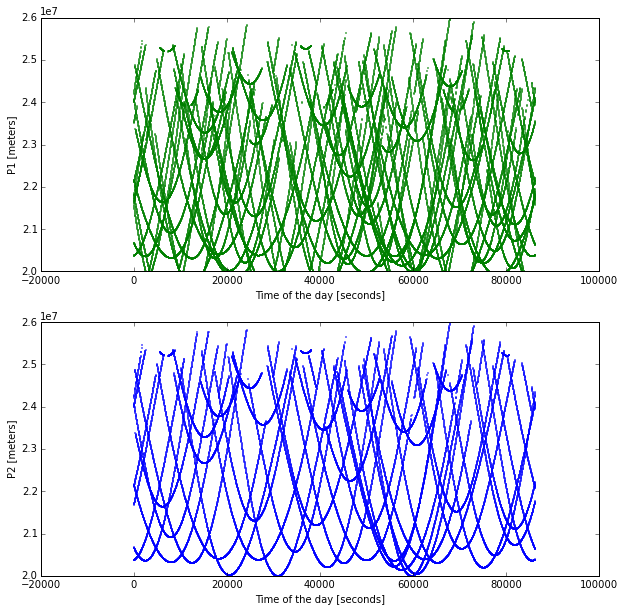

In [7]:
plotP1vsT(mad_o)

<h1>3) Graficar L1 y P1 en el tiempo</h1>

<h2>Con un satélite</h2>

In [8]:
import numpy as np
import gpstk
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

def L1P1vsT(ofile,strsat): 
    oheader, odata = gpstk.readRinex3Obs(ofile,strict=True)
    #tomar datos que sean del satelite
    ts=[]#segundos del dia
    L1=[] # distancia a partir de la frecuencia
    P1=[] #distancia a partir del código
    obs_types = np.array([i for i in oheader.R2ObsTypes])
    P1_idx = np.where(obs_types=="P1")[0][0]
    L1_idx = np.where(obs_types=="L1")[0][0]
    print obs_types #los indices varian, y los observables
    print "P1_index =", P1_idx
    print "L1_index =", L1_idx
    for obsdato in odata: #por cada intervalo 
        my_sat = [satID for satID, datumList in obsdato.obs.iteritems() ] #satelites en este tiempo observados
        for sat in my_sat:  #deberia poner un break? ya que el satelite esta en cada intervalo maximo unavez 
            if str(sat)==strsat:
                time=obsdato.time #tiempo de la observacion de mi satelite
                
                sod=float(time.getSecondOfDay())
                ts.append(sod)
                
                p1=obsdato.getObs(sat, P1_idx).data #P1 en t
                P1.append(p1)
                
                l1=obsdato.getObs(sat, L1_idx).data#P2 en t
                
                #print  l1*0.19, p1
                L1.append(l1*gpstk.L1_WAVELENGTH_GPS) #19.03 cm* numero de ciclos

    plt.figure()
    plt.subplot(211)
    plt.scatter(ts, P1, s=1, alpha=0.5, color="green",marker=".")
    plt.ylim(2e7,2.6e7)
    plt.title('P1 vs time')
    plt.ylabel('Distance Code P1 [meters]')
    plt.xlabel('Time of the day [seconds]')
    
    plt.subplot(212)
    plt.title('L1 vs time')
    plt.scatter(ts, L1, s=1, alpha=0.5, color="blue",marker=".")
    plt.ylabel('Distance Frequency L1 [meters]')
    plt.xlabel('Time of the day [seconds]')
            

    print "Seconds time of first observation: ",ts[0]
    print "Seconds time of last observation: ",ts[-1]
    print "Intervals: ",len(ts)


['L1' 'L2' 'C1' 'C2' 'P1' 'P2' 'S1' 'S2']
P1_index = 4
L1_index = 0
Seconds time of first observation:  0.0
Seconds time of last observation:  86370.0
Intervals:  967


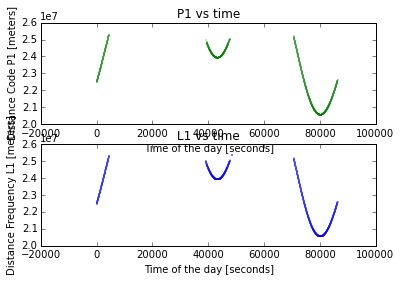

In [9]:
L1P1vsT(can_o,"GPS 5")

['L1' 'L2' 'L5' 'C1' 'P1' 'P2' 'C5' 'S1' 'S2' 'S5']
P1_index = 4
L1_index = 0
Seconds time of first observation:  0.0
Seconds time of last observation:  83520.0
Intervals:  977


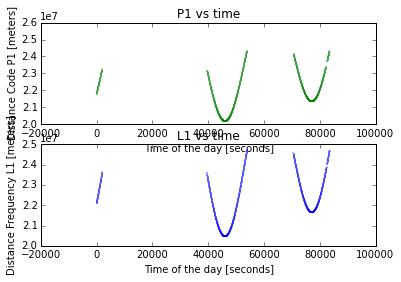

In [10]:
L1P1vsT(mad_o,"GLONASS 10")

##Con todos los satelites vistos por el receptor

In [11]:
import numpy as np
import gpstk
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
def L1P1vsT(ofile): 
    oheader,odata = gpstk.readRinex3Obs(ofile,strict=True)
    #tomar datos que sean del satelite
    ts=[]#segundos del dia
    L1=[] 
    P1=[]
    obs_types = np.array([i for i in oheader.R2ObsTypes])
    P1_idx =  np.where(obs_types=="P1")[0][0] 
    L1_idx =  np.where(obs_types=="L1")[0][0] 
    print obs_types #los indices varian, y los observables
    print "P1_index =", P1_idx
    print "L1_index =", L1_idx
    for obsdato in odata: #por cada intervalo 
        my_sat = [satID for satID, datumList in obsdato.obs.iteritems() ] #satelites en este tiempo observados
        for sat in my_sat:  #deberia poner un break? ya que el satelite esta en cada intervalo maximo unavez 
            time=obsdato.time #tiempo de la observacion de mi satelite

            sod=float(time.getSecondOfDay())
            ts.append(sod)

            p1=obsdato.getObs(sat, P1_idx).data #P1 en t
            P1.append(p1)

            l1=obsdato.getObs(sat, L1_idx).data#P2 en t
            L1.append(l1*gpstk.L1_WAVELENGTH_GPS)
        
    plt.figure(figsize=(10,8))
    plt.subplot(211)
    plt.ylim(1.8e7,2.7e7)
    plt.scatter(ts, P1, s=1, alpha=0.5, color="green",marker=".")
    plt.title('P1 vs time')
    plt.ylabel('Distance Code P1 [meters]')
    plt.xlabel('Time of the day [seconds]')
    
    plt.subplot(212)
    plt.title('L1 vs time')
    plt.scatter(ts, L1, s=1, alpha=0.5, color="blue",marker=".")
    plt.ylabel('Distance Frequency L1 [meters]')
    plt.xlabel('Time of the day [seconds]')
            

    print "Seconds time of first observation: ",ts[0]
    print "Seconds time of last observation: ",ts[-1]
    print "Intervals: ",len(ts)


['L1' 'L2' 'C1' 'C2' 'P1' 'P2' 'S1' 'S2']
P1_index = 4
L1_index = 0
Seconds time of first observation:  0.0
Seconds time of last observation:  86370.0
Intervals:  53770


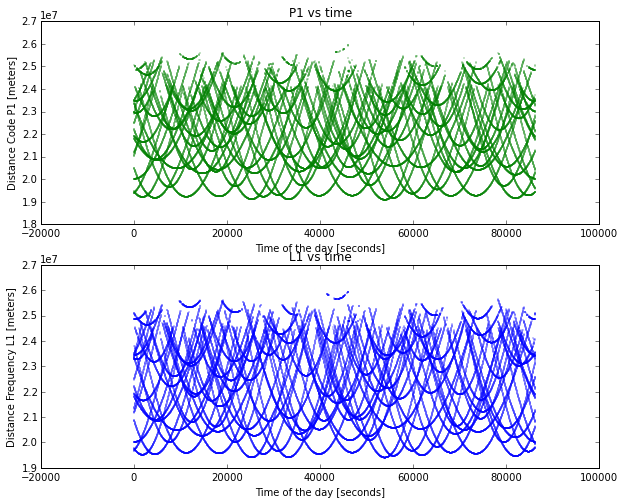

In [12]:
L1P1vsT(can_o)


<h1>3) Usar el método RAIMcompute para hallar la posición y calcular error NEU (north, east, up)</h1>

In [14]:
import numpy as np
import gpstk
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

def plotNEU(ofile,nfile,max_satellites=None ):
    oheader, odata = gpstk.readRinex3Obs(ofile,strict=True)
    nheader,ndata=gpstk.readRinex3Nav(nfile)
    
    obs_types = np.array([i for i in oheader.R2ObsTypes])
    print "Observables: ",obs_types
    P1_idx =  np.where(obs_types=="P1")[0][0] 
    
    bcestore = gpstk.GPSEphemerisStore() #var para almacenar la ephemerides
    
    for navDataObj in ndata:
        ephem = navDataObj.toGPSEphemeris()
        bcestore.addEphemeris(ephem)
    
    bcestore.SearchNear() 
    
    noTropModel = gpstk.ZeroTropModel()
    
    rec_pos = gpstk.Position(oheader.antennaPosition[0], oheader.antennaPosition[1], oheader.antennaPosition[2])
    rec_pos=np.array((rec_pos[0],rec_pos[1],rec_pos[2]))
    
    N, E, U, tN,tE,tU=[],[],[],[],[],[] #listas para almacenar errores North, east, up, tiempo de observacion
    
    for odatos in odata: #para cada intervalo obtengo la posicion real 
        prnList = [] 
        rangeList = []  #rangos p observados
        time = odatos.time
    
        # arrange P1 observations and satellites observed in a list
        sats_used = 0 #satelites usados
        for satID, datumList in odatos.obs.iteritems():
            if max_satellites is not None and sats_used>=max_satellites:
                break
            P1 = odatos.getObs(satID, P1_idx).data
            prnList.append(satID)
            rangeList.append(P1)
            sats_used += 1
        
        raimSolver = gpstk.PRSolution2()
    
        # this is just to adjust data types from underlying C implementation
        satVector = gpstk.seqToVector(prnList, outtype='vector_SatID')
        rangeVector = gpstk.seqToVector(rangeList)

        # compute position
        raimSolver.RAIMCompute(time, satVector, rangeVector, bcestore, noTropModel)   
        calculated_pos=np.array([raimSolver.Solution[0], raimSolver.Solution[1], raimSolver.Solution[2]])
        #print calculated_pos #efectivamente, varía
        East_error=np.linalg.norm(rec_pos[0]-calculated_pos[0])
        if East_error<1000:
        #print rec_pos[0],calculated_pos[0],rec_pos[1],calculated_pos[1],rec_pos[2],calculated_pos[2]
            E.append(East_error)
            tE.append(time.getSecondOfDay())
        North_error=np.linalg.norm(rec_pos[1]-calculated_pos[1])
        if North_error<1000:
            N.append(North_error)
            tN.append(time.getSecondOfDay())
        Up_error=np.linalg.norm(rec_pos[2]-calculated_pos[2])
        if Up_error<1000:
            tU.append(time.getSecondOfDay())
        
    N,E,U=np.array(N),np.array(E),np.array(U)
    
    
    print N.shape,E.shape,U.shape
    
    plt.figure()
    i=1
    
    if N.shape[0]!=0:
        print "Error medio en N [metros]: ",np.min(N),np.max(N),np.mean(N)
        plt.subplot(3,1,i)
        plt.title('N vs. time')
        #plt.ylim(-10,10)
        plt.scatter(tN,N, s=1, alpha=.5, color="green",marker=".")
        plt.ylabel('N error [meters]')
        plt.xlabel('Time of the day ')
        i+=1

    if E.shape[0]!=0:
        print "Error medio en E [metros]: ",np.min(E),np.max(E),np.mean(E)
        plt.subplot(3,1,i)
        plt.title('E vs. time')
        plt.scatter(tE,E, s=1, alpha=.5, color="green",marker=".")
        plt.ylabel('E error [meters]')
        plt.xlabel('Time of the day ')
        i+=1

    if U.shape[0]!=0:
        print "Error medio en U [metros]: ",np.min(U),np.max(U),np.mean(U)
        plt.subplot(3,1,i)
        plt.title('U vs. time')
        plt.scatter(tU,U, s=1, alpha=.5, color="green",marker=".")
        plt.ylabel('U error [meters]')
        plt.xlabel('Time of the day ')


Observables:  ['L1' 'L2' 'L5' 'C1' 'P1' 'P2' 'C5' 'S1' 'S2' 'S5']
(2659,) (2659,) (0,)
Error medio en N [metros]:  0.00209116458427 9.13801847701 1.85708146381
Error medio en E [metros]:  0.0786856617779 24.6549353125 9.96749045163


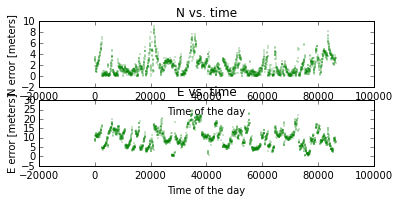

In [15]:
plotNEU(mad_o,mad_n,max_satellites=None)

Observables:  ['L1' 'L2' 'C1' 'C2' 'P1' 'P2' 'S1' 'S2']
(2021,) (2021,) (0,)
Error medio en N [metros]:  0.146278175991 20.385448901 9.23158728334
Error medio en E [metros]:  0.00242902338505 8.20455138013 2.64331372279


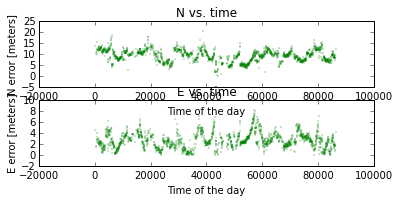

In [16]:
plotNEU(can_o,can_n,max_satellites=None)

<h1>4) Make skyplot → use obs to get times and visible satellies → use nav file to obtain previous orbital params → compute X,Y,Z, el, az → use el, az to make skyplot → compare with Gage.</h1>


In [17]:
import numpy as np
import gpstk
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

def skyplot(ofile,nfile):
    
    oheader, odata = gpstk.readRinex3Obs(ofile,strict=True)
    nheader,ndata=gpstk.readRinex3Nav(nfile)
    #obtener de los datos  de navegacion , la ephemerides
    bcestore = gpstk.GPSEphemerisStore()
    el,az=[],[] #elevación y azimuth de satelites (con esto se realiza la grafica) coor polares
    times=[]
    for navDataObj in ndata:
        ephem = navDataObj.toGPSEphemeris()
        bcestore.addEphemeris(ephem)

    bcestore.SearchNear()
    
    rec_pos = gpstk.Position(oheader.antennaPosition[0], oheader.antennaPosition[1], oheader.antennaPosition[2])
    #encontramos cada satelite observado en un tiempo y calculamos el y az

    for obsObject in odata:
        #sats GPS en ese intervalo 
        sats=[satID for satID, datumList in obsObject.obs.iteritems() if str(satID).split()[0]=="GPS" ] 

        for sat in sats:
            time = obsObject.time 
            times.append(time.getSecondOfDay())
            eph = bcestore.findEphemeris(sat, time) #datos del satelite
            sat_pos = eph.svXvt(obsObject.time)  # Obtengo x y z de satelite
            elev = oheader.antennaPosition.elvAngle(sat_pos.x)# el y az estan en grados
            azim = oheader.antennaPosition.azAngle(sat_pos.x)
            el.append(elev)
            az.append(azim)
        
    el, az=np.array(el),np.array(az)
    
    x  = np.cos((np.pi/2)-(az*np.pi/180))*(90-el)/90 #then divide el by 90 deg to get scale
    y  = np.sin((np.pi/2)-(az*np.pi/180))*(90-el)/90 #theta =90-az r=90-el coor polares 
    
    
    plt.figure()
    plt.scatter( x,y, alpha=.5, marker=1, c=times)
    


Ecuador


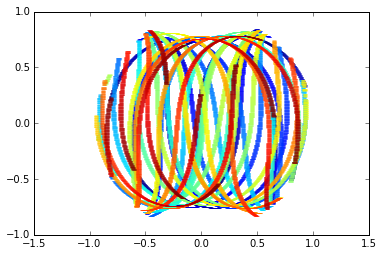

In [18]:
print "Ecuador"
skyplot(ec_o,ec_n)

Canada


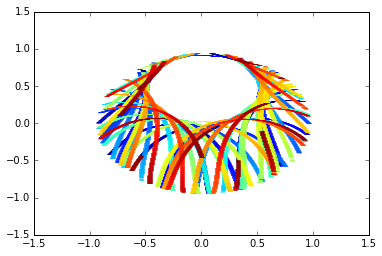

In [19]:
print "Canada"
skyplot(can_o,can_n) 

Madrid


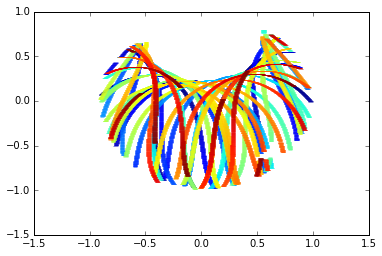

In [20]:
print "Madrid"
skyplot(mad_o,mad_n)

<h2>5) Compute Satellite Position Iterative Least Square Position</h2>

In [100]:
import numpy as np
import gpstk
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

can_n="data/flin2400.15n"
can_o="data/flin2400.15o"
mad_n="data/madr2400.15n"
mad_o="data/madr2400.15o"
ec_n="data/riop2400.15n"
ec_o="data/riop2400.15o"


def getposition(ofile,nfile):
    
    n_header,n_data=gpstk.readRinex3Nav(nfile)
    o_header,o_data=gpstk.readRinex3Obs(ofile)
    
    bcestore=gpstk.GPSEphemerisStore()
    
    for datonav in n_data:
        ephem = datonav.toGPSEphemeris()
        bcestore.addEphemeris(ephem)
   
    bcestore.SearchNear()
   
    GM= 3.986005e14 #miu, constante gravitacional GxM de la tierra
    we=7.292115e-5
    #observacion= o_data.next() #solo usaré un objeto de observacion
    X,Y,Z,t=[],[],[],[]
    
    for observacion in o_data:
        
        sats=[satID for satID, datumList in observacion.obs.iteritems() if str(satID).split()[0]=="GPS" ] 

        for sat in sats:
            timeo=observacion.time #common time 
            eph=bcestore.findEphemeris(sat,timeo)
            sat_pos = eph.svXvt(observacion.time).getPos()#posicion del satelite
            teph=eph.transmitTime
            toe=eph.ctToe 
            toc=eph.ctToc 
            #print sat,gpstk.CivilTime(teph),gpstk.CivilTime(timeo),gpstk.CivilTime(toe),gpstk.CivilTime(toc)
            a=eph.A 
            ecc=eph.ecc 
            i0= eph.i0#inclinacion en tiempo 
            omega0=eph.OMEGA0 #Longitude of ascending node at reference time (semicir
            w=eph.w #argumento de perigeo
            M0=eph.M0 #mean anomaly
            dn=eph.dn #delta :Mean motion difference from computed value (semicircles/s)  
            omegadot=eph.OMEGAdot
            idot=eph.idot
            Cus,Cuc,Cic,Cis=eph.Cus,eph.Cuc,eph.Cic,eph.Cis 
            Crs,Crc=eph.Crs,eph.Crc
            dt=timeo.getDays()*24*60*60-teph.getDays()*24*60*60
            #print "dt= ",dt
            T=(2*np.pi)/np.sqrt(GM/a**3)
            n0=np.sqrt(GM/a**3)
            n=n0+dn
            Mk=M0+(n*dt)
            E = Mk 
            delta = 1
            #Eccentric anomaly !
            while delta>1e-13  :
                Ei= Mk + (ecc*np.sin(E))
                delta = np.abs(E-Ei)  #print delta
                E = Ei
            #print "final delta:",delta

            cosvk=(np.cos(Ei)-ecc)/(1-(ecc*np.cos(Ei)))#True anomaly
            sinvk=(np.sqrt(1-ecc**2)*np.sin(Ei))/(1-(ecc*np.cos(Ei))) #nan es porde da negatiov

            #calculo true anomaly vk
            if np.arccos(cosvk)<0:
                vk=2*np.pi-np.arccos(cosvk)
            else:
                vk=np.pi-np.arccos(cosvk)
                
            fik=vk+w #arg latitud
            duk= Cuc*np.cos(2*fik) + Cus*np.sin(2*fik) #corr latit
            drk=Crc*np.cos(2*fik)+Crs*np.sin(2*fik)
            dik=Cic*np.cos(2*fik)+Cis*np.sin(2*fik)
            uk=fik*duk
            rk=a*(1-(ecc*np.cos(Ei)))+drk#nan
            ik= i0 +(idot*dt)+dik #nan
            Xk=rk*np.cos(uk)
            Yk=rk*np.sin(uk)
            OMEGAk = omega0+(omegadot-we)*dt-we*(toe.getDays()*24*60*60)
            x=Xk*np.cos(OMEGAk)+(Yk*np.sin(OMEGAk)*np.cos(ik))
            y=Xk*np.sin(OMEGAk)+(Yk*np.cos(OMEGAk)*np.cos(ik))
            zk=Yk*np.sin(ik)

            #print x,sat_pos[0]
            
            t.append(timeo.getSecondOfDay())
            X_error=np.linalg.norm(sat_pos[0]-x)
            X.append(X_error)
            Y_error=np.linalg.norm(sat_pos[1]-y)
            Y.append(Y_error)
            Z_error=np.linalg.norm(sat_pos[2]-zk)
            Z.append(Z_error)
    
    print "Error Posicion satelite en X: ", np.mean(X)
    print "Error Posicion satelite en Y: ", np.mean(Y)
    print "Error Posicion satelite en Z: ", np.mean(Z)
    
    plt.figure(figsize=(10,8))
    plt.subplot(3,1,1)
    plt.title('Sat Error X vs. time in day')
    plt.scatter(t,X, s=1, alpha=.5, color="green",marker=".")
    plt.ylabel('X error [meters]')
    plt.xlabel('Time of the day ')
    
    plt.subplot(3,1,2)
    plt.title('Sat Error Y vs. time in day')
    plt.scatter(t,Y, s=1, alpha=.5, color="green",marker=".")
    plt.ylabel('Y error [meters]')
    plt.xlabel('Time of the day ')
    
    plt.subplot(3,1,3)
    plt.title('Sat Error Z vs. time in day')
    plt.scatter(t,Z, s=1, alpha=.5, color="green",marker=".")
    plt.ylabel('Z error [meters]')
    plt.xlabel('Time of the day ')
    




Error Posicion satelite en X:  17608115.6028
Error Posicion satelite en Y:  17078813.6171
Error Posicion satelite en Z:  13346836.931


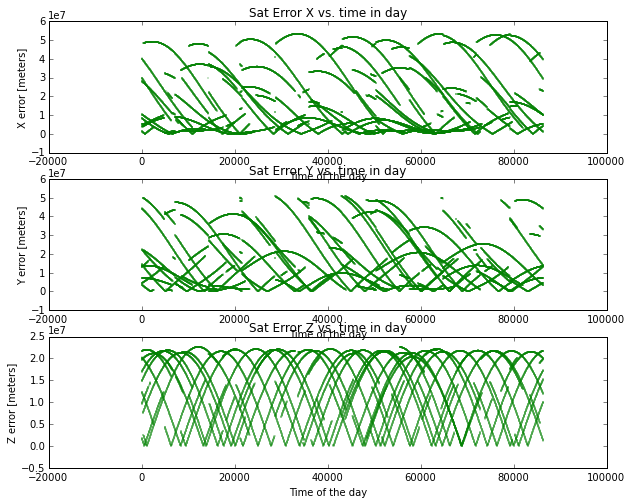

In [101]:
getposition(mad_o,mad_n)

## stuff

In [32]:
#1859( 835)  432030   Fri-5   240      30   08/28/2015   00:00:30 GPS  02gps
nheader, ndata = gpstk.readRinex3Nav('data/madr2400.15n')

print "---------"
#print ndata.next()
#print ndata.next().time.getDays()
tiempo=ndata.next().time
print tiempo
#print data.next().Toe
print "---------"
#comtime
gpstime = gpstk.GPSWeekSecond(tiempo)
print "Tiempo",gpstime
print "Semana", gpstime.week
print "Semana", gpstime.getModWeek()




---------
2457263 07200000 0.000000000000000 GPS
---------
Tiempo 1859 439200.000000 GPS
Semana 1859
Semana 835


In [ ]:
for datonav in data:
    #print datonav.time.getDays()
    print datonav.satID